In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
pd.set_option('display.max_columns', None)

In [31]:
df = pd.read_csv(r'C:\Users\pradeep dubey\Desktop\project\Real_State_Project\data\feature_engineering\gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [32]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bptp astaire gardens,sector 70a,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up...,4.0,4.0,3,1.0,NaN,Relatively New,1848.0,1600.0,1400.0,1,0,0,0,1,0,42
1,house,puri diplomatic greens,sector 111,9.00,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5.0,5.0,3+,3.0,North-East,Relatively New,NaN,8000.0,NaN,0,1,0,0,0,0,112
2,flat,m3m skywalk,sector 74,2.25,12500.0,1800.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3.0,3.0,3,5.0,North-East,Relatively New,2000.0,1900.0,1800.0,1,0,0,0,0,0,174
3,house,independent,sector 55,5.60,20741.0,2700.0,Plot area 300(250.84 sq.m.),6.0,4.0,3,3.0,East,Old Property,NaN,2700.0,NaN,0,1,0,0,0,2,41
4,house,sushant lok 1 builder floors,sector 43,2.45,7756.0,3159.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq...,4.0,4.0,3+,3.0,West,Moderately Old,NaN,540.0,351.0,1,1,0,1,1,1,123


In [34]:
df.shape

(3679, 23)

In [35]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

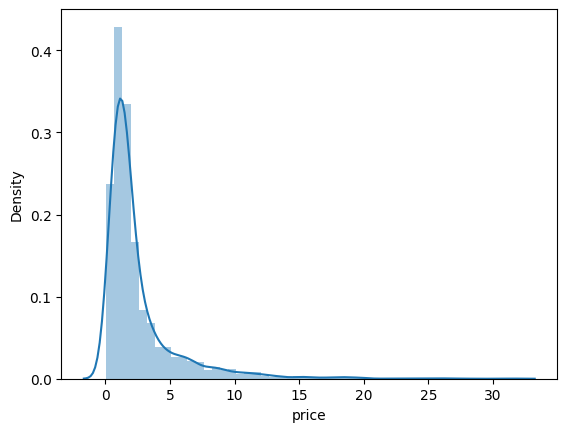

In [36]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

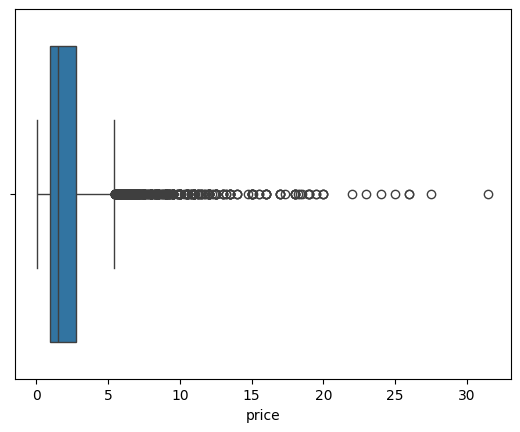

In [37]:
sns.boxplot(x=df['price'])

In [38]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [39]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2282,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7.0,9.0,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,1,74
3797,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
3316,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
3733,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,138
1207,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
1267,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
1294,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,145
2955,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5.0,6.0,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
611,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,1,97
3333,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16.0,20.0,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,153


In [40]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

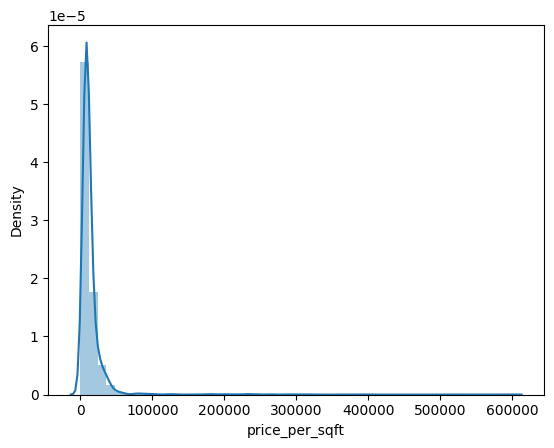

In [41]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

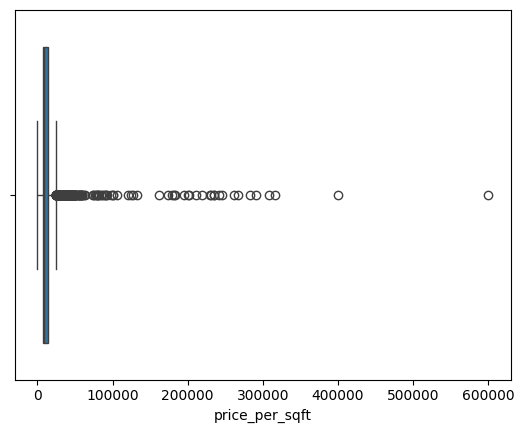

In [42]:
sns.boxplot(x=df['price_per_sqft'])

In [43]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [44]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [45]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [46]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [47]:
df.update(outliers_sqft)

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

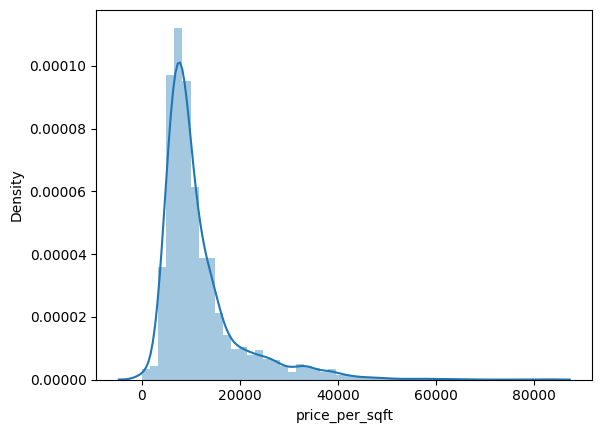

In [48]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

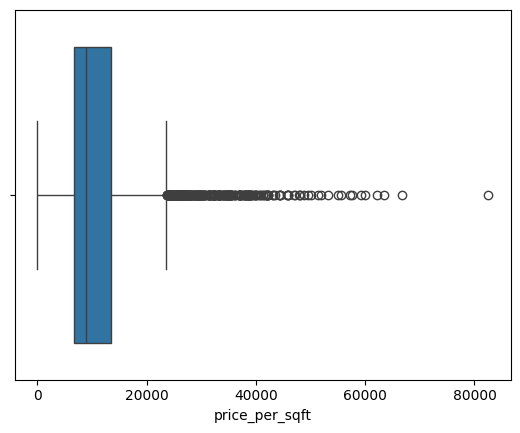

In [49]:
sns.boxplot(x=df['price_per_sqft'])

In [50]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
199,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0
584,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0
592,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
1247,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,2,103
1267,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
1345,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,1,75
1621,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,2,99
2494,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16.0,17.0,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,1,137
2709,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,2,160
3227,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,2,153


In [51]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

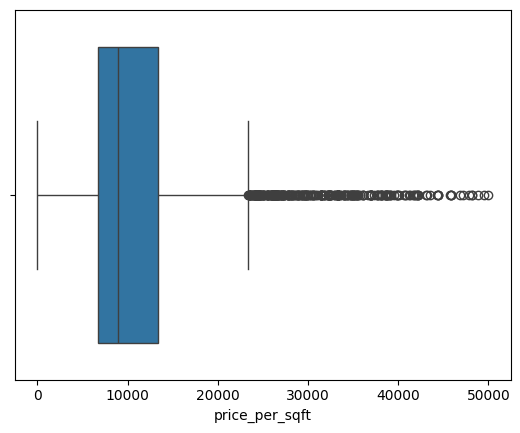

In [54]:
sns.boxplot(x=df['price_per_sqft'])

### Area

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

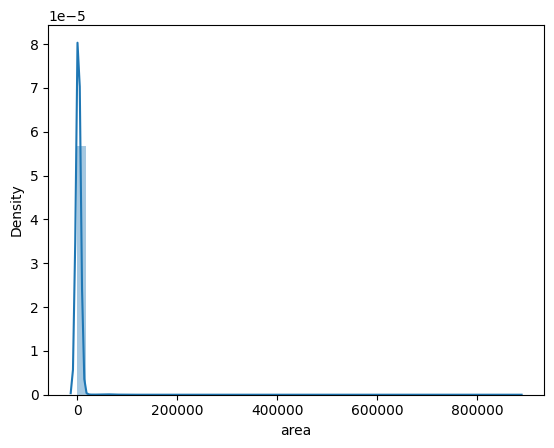

In [55]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

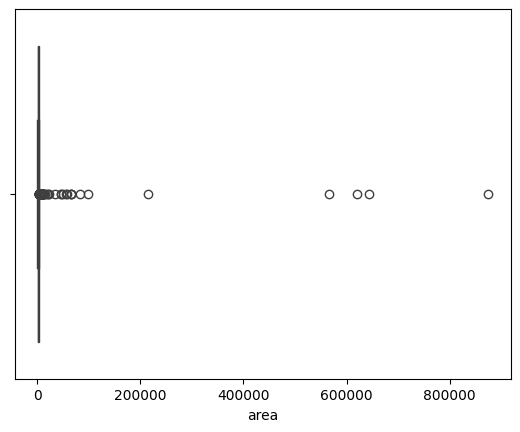

In [56]:
sns.boxplot(x=df['area'])

In [57]:
df['area'].describe()

count      3648.000000
mean       2947.103344
std       23205.042305
min         145.000000
25%        1261.750000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [58]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
429,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
1178,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,2,0
1406,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
3182,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,1,44
3736,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76


In [59]:
df = df[df['area'] < 100000]

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

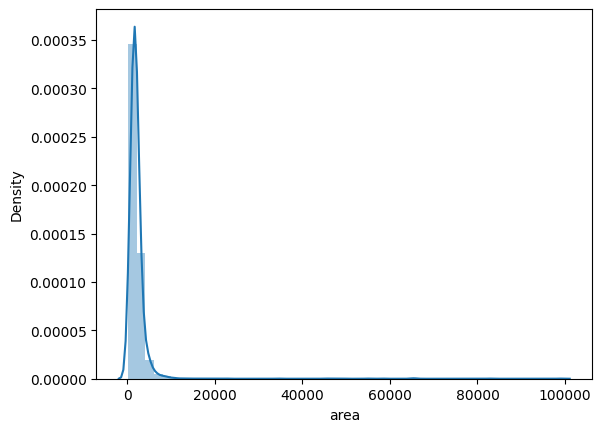

In [60]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

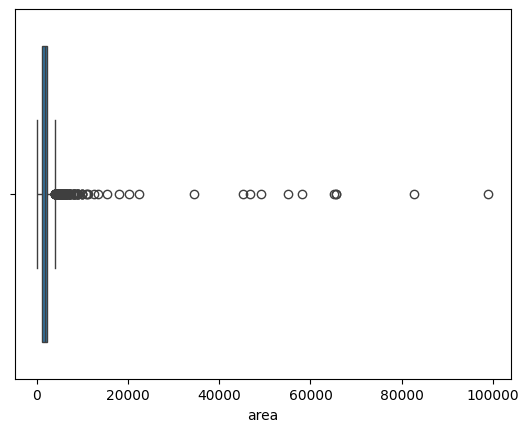

In [61]:
sns.boxplot(x=df['area'])

In [62]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 2710,401,3146,1624,658,2469,792,2258,2967

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2710,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,2,60
267,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
401,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
3146,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
297,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
1624,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
658,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
2469,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
537,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109
792,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [63]:
df.drop(index=[2710,401,3146,1624,658,2469,792,2258,2967], inplace=True)

In [64]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
267,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
297,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
537,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109
605,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,2,61
1533,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,2,123
925,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.00,1,0,0,1,1,2,44
1477,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3.0,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
1309,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
3797,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
477,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,0,60


In [65]:
df.loc[267,'area'] = 115*9
df.loc[297,'area'] = 7250
df.loc[537,'area'] = 5800
df.loc[605,'area'] = 2660
df.loc[1533,'area'] = 2850
df.loc[925,'area'] = 1812
df.loc[1477,'area'] = 2160
df.loc[1309	,'area'] = 1175

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_5708\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

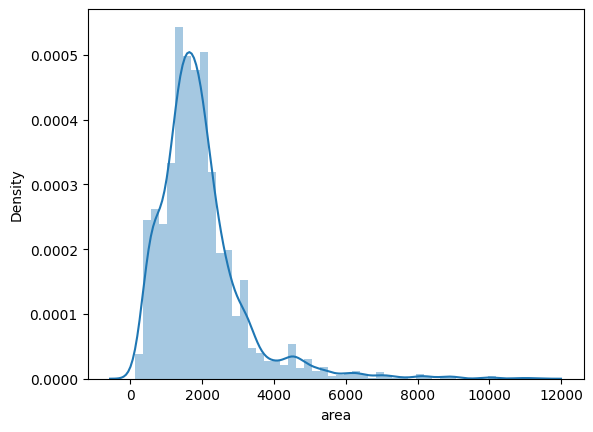

In [224]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

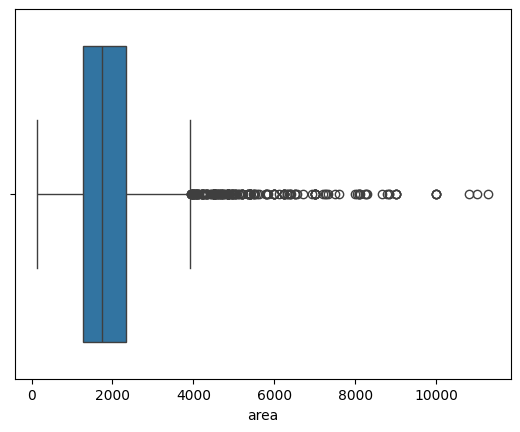

In [66]:
sns.boxplot(x=df['area'])

In [67]:
df['area'].describe()

count     3634.000000
mean      1950.008806
std       1215.721792
min        145.000000
25%       1260.000000
50%       1746.500000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

### Bedroom

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

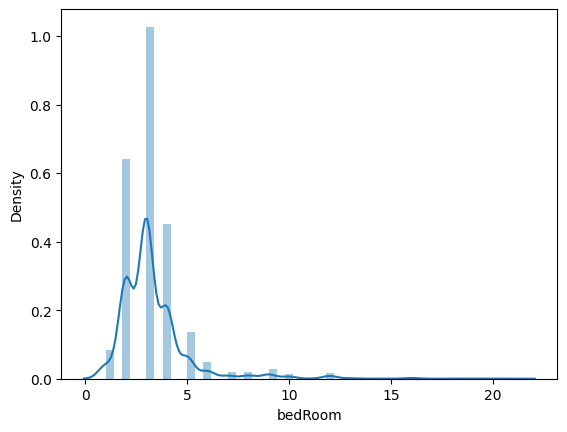

In [68]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

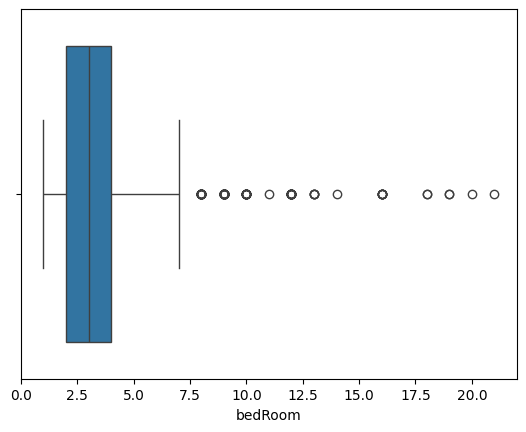

In [69]:
sns.boxplot(x=df['bedRoom'])

In [70]:
df['bedRoom'].describe()

count    3634.000000
mean        3.333517
std         1.829791
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [71]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2374,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,1,49
1873,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,1,22
2488,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
1602,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
1176,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,1,57
41,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,1,70
2057,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16.0,16.0,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,2,20
3368,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,2,49
3333,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16.0,20.0,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,153
3210,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,2,0


In [72]:
df = df[df['bedRoom'] <= 10]

In [73]:
df.shape

(3589, 23)

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

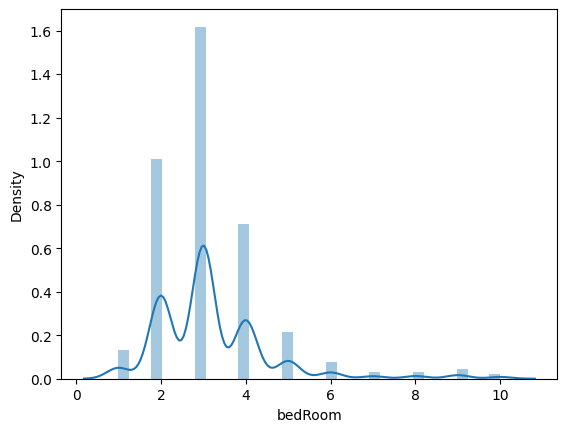

In [74]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

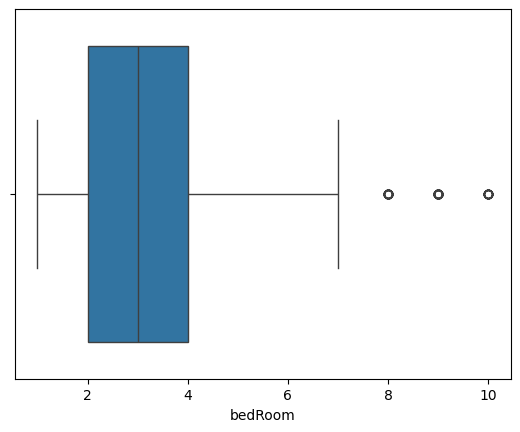

In [75]:
sns.boxplot(x=df['bedRoom'])

In [76]:
df['bedRoom'].describe()

count    3589.000000
mean        3.203678
std         1.393778
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

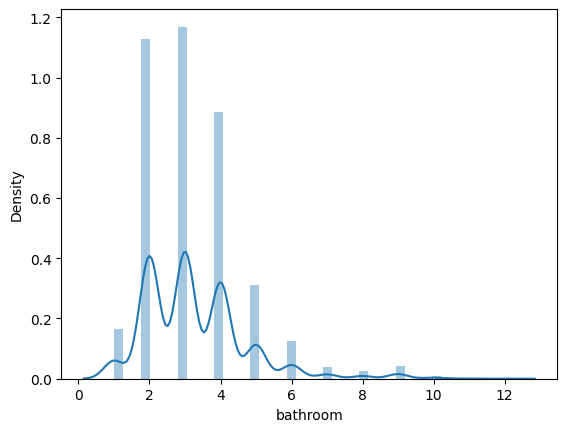

In [77]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

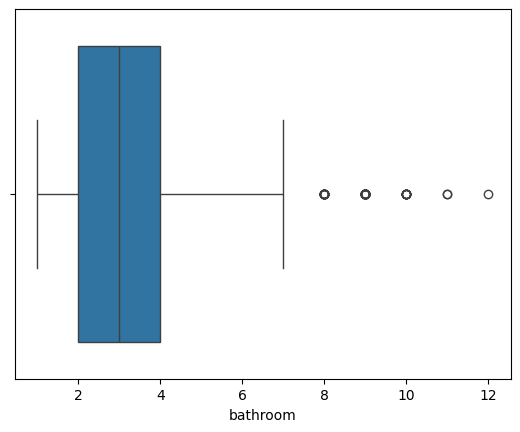

In [78]:
sns.boxplot(x=df['bathroom'])

In [79]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1538,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,2,146
2639,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,2,39
3126,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38


In [80]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bptp astaire gardens,sector 70a,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up...,4.0,4.0,3,1.0,NaN,Relatively New,1848.0,1600.0,1400.0,1,0,0,0,1,0,42
1,house,puri diplomatic greens,sector 111,9.00,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5.0,5.0,3+,3.0,North-East,Relatively New,NaN,8000.0,NaN,0,1,0,0,0,0,112
2,flat,m3m skywalk,sector 74,2.25,12500.0,1800.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3.0,3.0,3,5.0,North-East,Relatively New,2000.0,1900.0,1800.0,1,0,0,0,0,0,174
3,house,independent,sector 55,5.60,20741.0,2700.0,Plot area 300(250.84 sq.m.),6.0,4.0,3,3.0,East,Old Property,NaN,2700.0,NaN,0,1,0,0,0,2,41
4,house,sushant lok 1 builder floors,sector 43,2.45,7756.0,3159.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq...,4.0,4.0,3+,3.0,West,Moderately Old,NaN,540.0,351.0,1,1,0,1,1,1,123


### super built up area

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

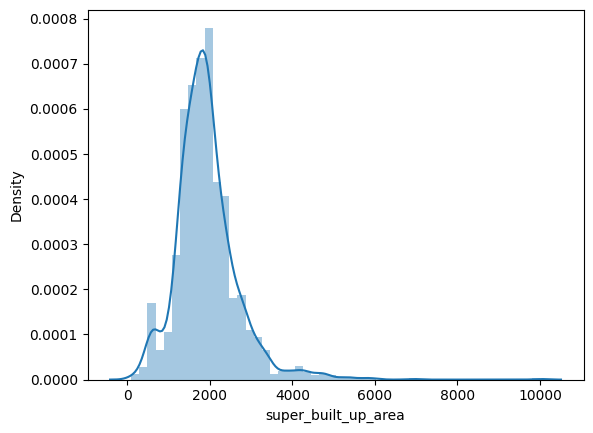

In [81]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

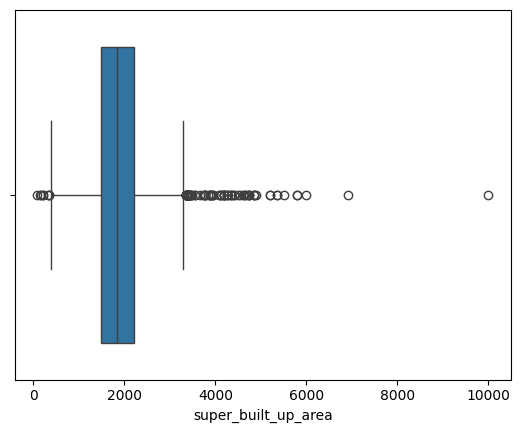

In [82]:
sns.boxplot(x=df['super_built_up_area'])

In [83]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [84]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2457,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49
2584,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,2,140


### built up area

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

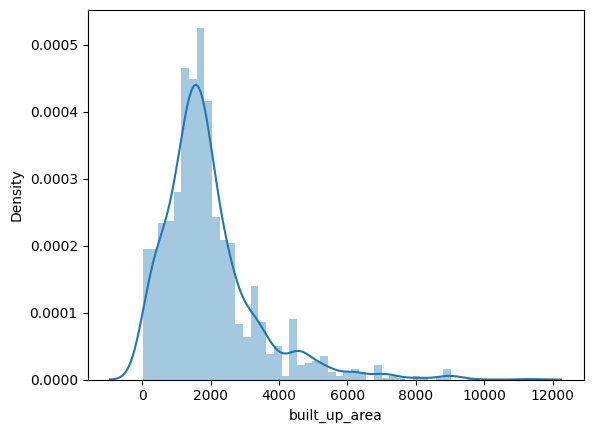

In [85]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

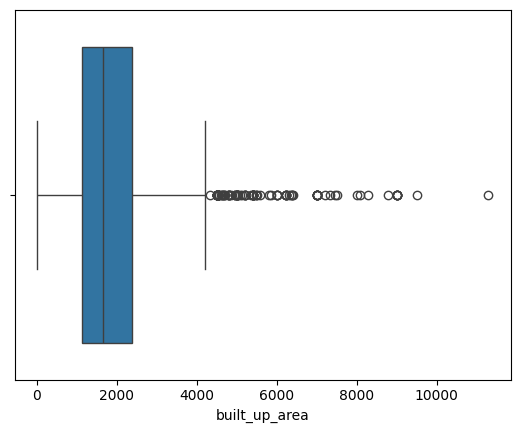

In [86]:
sns.boxplot(x=df['built_up_area'])

In [87]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3797,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42


### carpet area

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

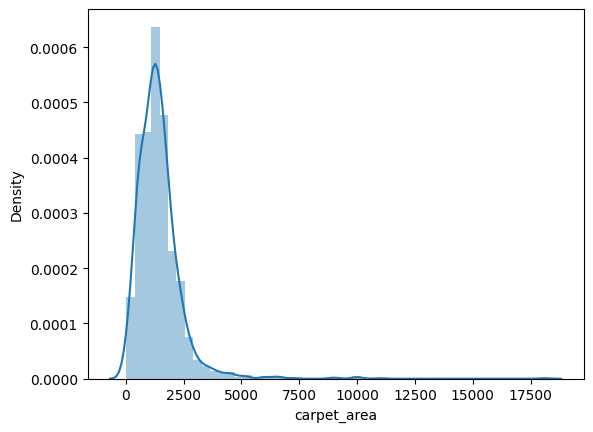

In [88]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

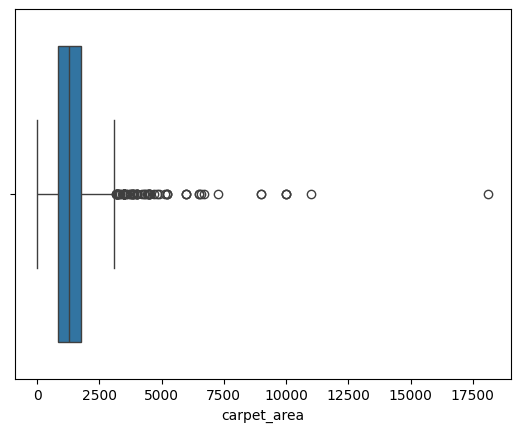

In [89]:
sns.boxplot(x=df['carpet_area'])

In [90]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
477,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60
925,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1,0,0,1,1,2,44


In [92]:
df.loc[925,'carpet_area'] = 1812

In [93]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
477,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [94]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bptp astaire gardens,sector 70a,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up...,4.0,4.0,3,1.0,NaN,Relatively New,1848.0,1600.0,1400.0,1,0,0,0,1,0,42
1,house,puri diplomatic greens,sector 111,9.00,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5.0,5.0,3+,3.0,North-East,Relatively New,NaN,8000.0,NaN,0,1,0,0,0,0,112
2,flat,m3m skywalk,sector 74,2.25,12500.0,1800.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3.0,3.0,3,5.0,North-East,Relatively New,2000.0,1900.0,1800.0,1,0,0,0,0,0,174
3,house,independent,sector 55,5.60,20741.0,2700.0,Plot area 300(250.84 sq.m.),6.0,4.0,3,3.0,East,Old Property,NaN,2700.0,NaN,0,1,0,0,0,2,41
4,house,sushant lok 1 builder floors,sector 43,2.45,7756.0,3159.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq...,4.0,4.0,3+,3.0,West,Moderately Old,NaN,540.0,351.0,1,1,0,1,1,1,123


C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

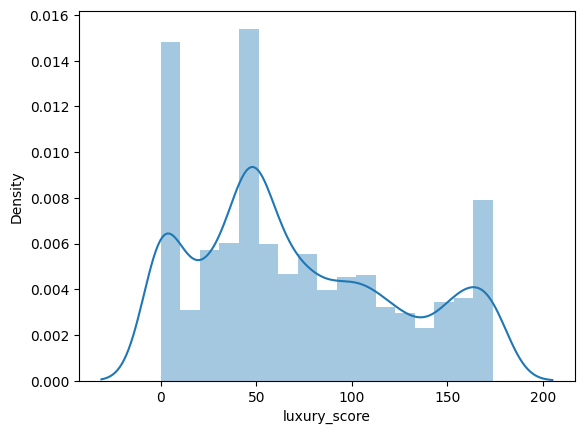

In [95]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

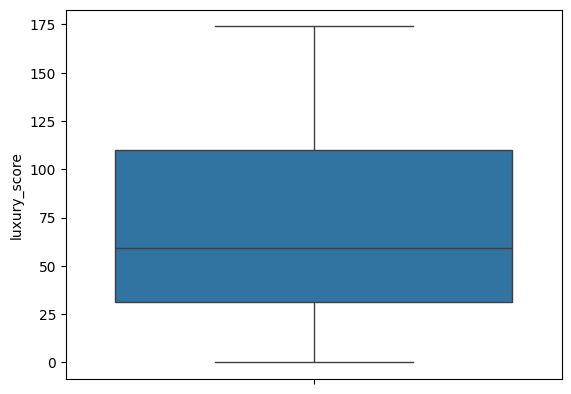

In [96]:
sns.boxplot(df['luxury_score'])

In [97]:
df.shape

(3589, 23)

In [98]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [99]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bptp astaire gardens,sector 70a,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up...,4.0,4.0,3,1.0,NaN,Relatively New,1848.0,1600.0,1400.0,1,0,0,0,1,0,42
1,house,puri diplomatic greens,sector 111,9.00,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5.0,5.0,3+,3.0,North-East,Relatively New,NaN,8000.0,NaN,0,1,0,0,0,0,112
2,flat,m3m skywalk,sector 74,2.25,12500.0,1800.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3.0,3.0,3,5.0,North-East,Relatively New,2000.0,1900.0,1800.0,1,0,0,0,0,0,174
3,house,independent,sector 55,5.60,20741.0,2700.0,Plot area 300(250.84 sq.m.),6.0,4.0,3,3.0,East,Old Property,NaN,2700.0,NaN,0,1,0,0,0,2,41
4,house,sushant lok 1 builder floors,sector 43,2.45,7756.0,3159.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq...,4.0,4.0,3+,3.0,West,Moderately Old,NaN,540.0,351.0,1,1,0,1,1,1,123


C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

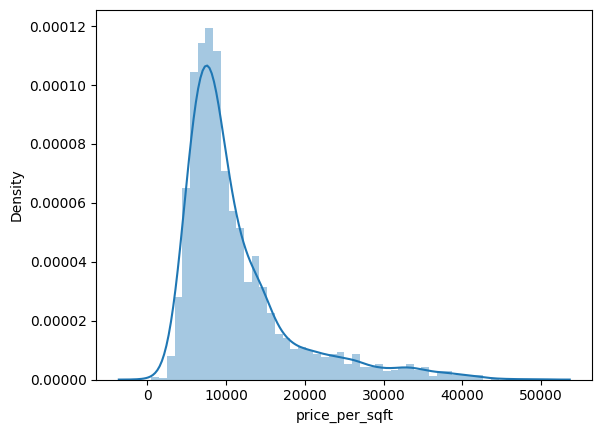

In [100]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

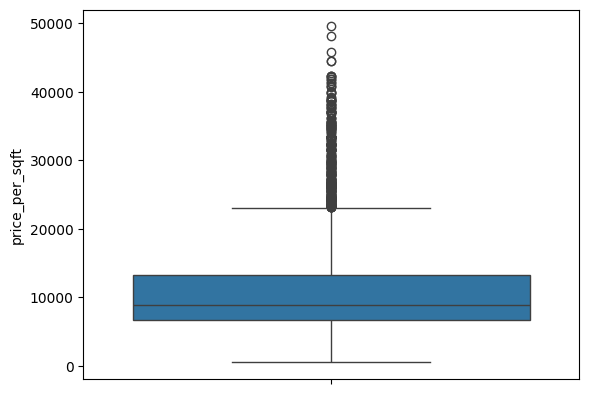

In [101]:
sns.boxplot(df['price_per_sqft'])

In [102]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
611,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,1,97
690,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,2,7
876,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,2,103
1433,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,2,44
1876,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,2,121
2668,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,1,0
2734,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,2,88
3577,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
3686,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,2,60


In [103]:
df.shape

(3589, 23)

In [104]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

250.5

In [105]:
df[(df['area']/df['bedRoom'])<250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
173,house,independent,sector 24,3.50,32407.0,1080.0,Plot area 120(100.34 sq.m.),5.0,4.0,3,3.0,North-West,Old Property,NaN,1080.0,NaN,0,0,0,0,0,0,15
3318,house,independent,sector 9,0.22,7407.0,297.0,Carpet area: 33 (27.59 sq.m.),2.0,2.0,2,1.0,NaN,Undefined,NaN,NaN,33.0,0,0,0,0,0,0,0
3243,house,independent,sector 7,0.95,21111.0,450.0,Plot area 450(41.81 sq.m.),2.0,1.0,1,3.0,NaN,New Property,NaN,450.0,NaN,0,0,0,0,0,0,15
979,flat,pivotal devaan,sector 84,0.36,7595.0,474.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2.0,2.0,1,9.0,West,Relatively New,583.0,NaN,481.0,0,0,1,0,0,1,80
2788,house,independent,sector 2,1.15,19360.0,594.0,Plot area 66(55.18 sq.m.),3.0,3.0,2,2.0,South-East,Old Property,NaN,594.0,NaN,0,0,0,0,0,2,32


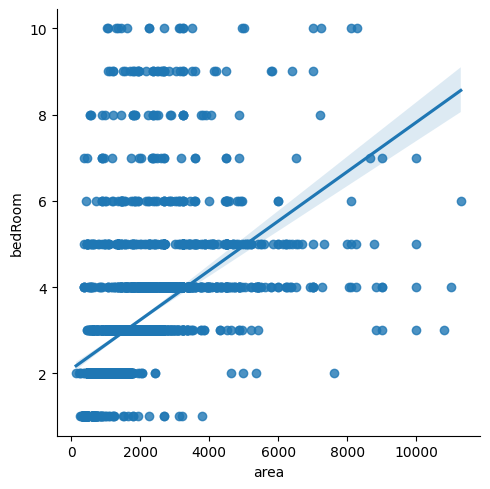

In [106]:
sns.lmplot(data=df,x="area",y="bedRoom")

In [107]:
df["area_room_ratio"]=df["area"]/df["bedRoom"]

In [108]:
(df[df["area_room_ratio"]<183])["bedRoom"].value_counts()

bedRoom
5.0     19
4.0     13
6.0      7
7.0      7
8.0      7
10.0     6
9.0      6
3.0      6
2.0      6
Name: count, dtype: int64

In [109]:
df=df[df["area_room_ratio"]>100]

In [110]:
outliers_df=df[(df["area_room_ratio"]<250)&(df["bedRoom"]>3)]

In [111]:
outliers_df["bedRoom"]=round(outliers_df["bedRoom"]/outliers_df["floorNum"])

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_31972\1708023542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df["bedRoom"]=round(outliers_df["bedRoom"]/outliers_df["floorNum"])


In [112]:
df.update(outliers_df)

In [113]:
df["area_room_ratio"]=df["area"]/df["bedRoom"]

In [114]:
df[(df["area_room_ratio"]<250)&( df["bedRoom"]>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
364,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
432,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2.0,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,29,120.600000
1057,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,0,0,220.000000
1739,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1.0,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
2323,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
2411,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,0,0,166.666667
2445,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
2804,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000
3244,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.750000
3558,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,0,0,150.000000


In [115]:
df[(df["area_room_ratio"]<250)&( df["bedRoom"]>4)].shape

(13, 24)

In [116]:
df.shape

(3569, 24)

In [117]:
df=df[~((df["area_room_ratio"]<250)&( df["bedRoom"]>4))]

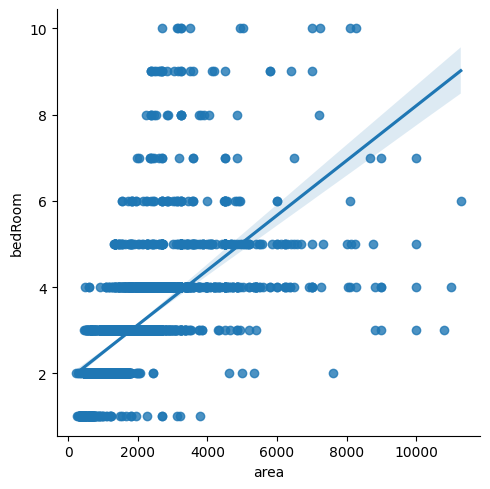

In [118]:
sns.lmplot(data=df,x="area",y="bedRoom")

In [119]:
df.shape

(3556, 24)

In [120]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,bptp astaire gardens,sector 70a,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up...,4.0,4.0,3,1.0,NaN,Relatively New,1848.0,1600.0,1400.0,1,0,0,0,1,0,42,462.00
1,house,puri diplomatic greens,sector 111,9.00,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5.0,5.0,3+,3.0,North-East,Relatively New,NaN,8000.0,NaN,0,1,0,0,0,0,112,1600.00
2,flat,m3m skywalk,sector 74,2.25,12500.0,1800.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3.0,3.0,3,5.0,North-East,Relatively New,2000.0,1900.0,1800.0,1,0,0,0,0,0,174,600.00
3,house,independent,sector 55,5.60,20741.0,2700.0,Plot area 300(250.84 sq.m.),6.0,4.0,3,3.0,East,Old Property,NaN,2700.0,NaN,0,1,0,0,0,2,41,450.00
4,house,sushant lok 1 builder floors,sector 43,2.45,7756.0,3159.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq...,4.0,4.0,3+,3.0,West,Moderately Old,NaN,540.0,351.0,1,1,0,1,1,1,123,789.75


In [121]:
import os

# Define the absolute path to the processed data folder
data_path = r"C:\Users\pradeep dubey\Desktop\project\Real_State_Project\data\feature_engineering"

# Create the directory if it doesn't exist
os.makedirs(data_path, exist_ok=True)

# Assuming df is already defined, save the DataFrame to the specified path
df.to_csv(os.path.join(data_path, "gurgaon_properties_outlier_treated.csv"), index=False)


In [124]:
df.shape

(3556, 24)